# 1. Import The Libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


print("="*60)
print("K-Means Clustering")
print("="*60)

K-Means Clustering


# 2.Load The Data

In [3]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 3. Keep Numeric Features

In [4]:
df_features = df.drop(columns=["species"])
print(f"Shape of features: {df_features.shape}")
df_features.head()

Shape of features: (150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 4. Scaling The Features

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
print(f"Scaled data shape: {df_scaled.shape}")
print(f"Mean: {df_scaled.mean():.4f}, Std: {df_scaled.std():.4f}")

Scaled data shape: (150, 4)
Mean: -0.0000, Std: 1.0000


# 5. Find Optimal Epsilon (eos) Parameter


FINDING OPTIMAL EPS


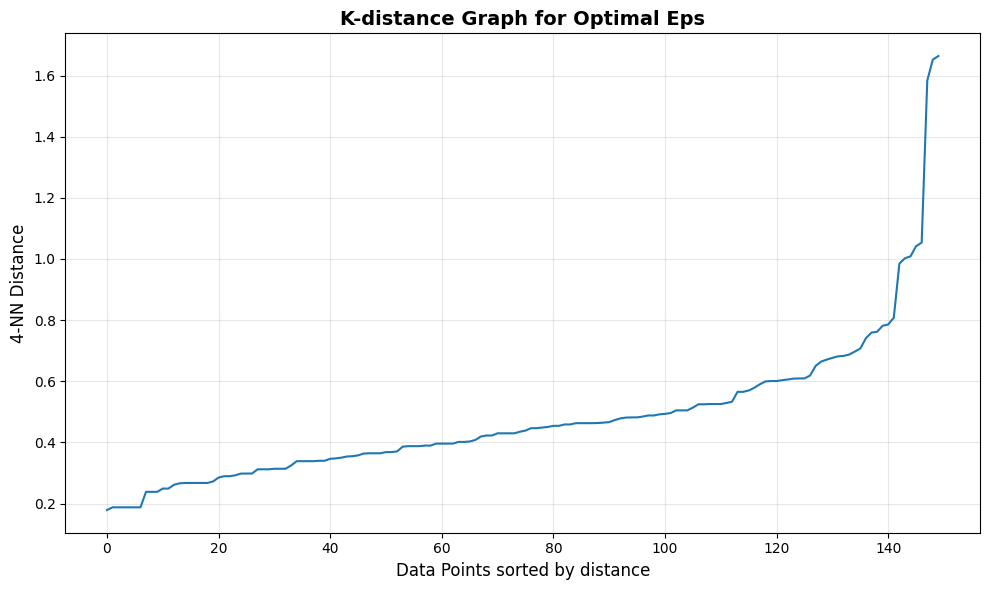


Suggested eps value: Look for the 'elbow' in the graph above
Typical range: 0.707 - 0.985


In [6]:
print("\n" + "="*60)
print("FINDING OPTIMAL EPS")
print("="*60)

# Calculate k-nearest neighbors distances
k = 4  # min_samples - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(df_scaled)
distances, indices = neighbors.kneighbors(df_scaled)

# Sort distances
distances = np.sort(distances[:, k-1], axis=0)

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=12)
plt.ylabel(f'{k}-NN Distance', fontsize=12)
plt.title('K-distance Graph for Optimal Eps', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nSuggested eps value: Look for the 'elbow' in the graph above")
print(f"Typical range: {distances[int(len(distances)*0.9)]:.3f} - {distances[int(len(distances)*0.95)]:.3f}")

# 6. Test Different DBSCAN Parameters

In [7]:
print("\n" + "="*60)
print("TESTING DIFFERENT PARAMETERS")
print("="*60)

eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_values = [3, 4, 5]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if n_clusters > 1:
            silhouette = silhouette_score(df_scaled, labels)
        else:
            silhouette = -1
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': silhouette
        })
        
        print(f"eps={eps}, min_samples={min_samples}: "
              f"Clusters={n_clusters}, Noise={n_noise}, "
              f"Silhouette={silhouette:.4f}")

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results)
print("\nBest parameters (by Silhouette Score):")
best_result = results_df.loc[results_df['silhouette'].idxmax()]
print(best_result)


TESTING DIFFERENT PARAMETERS
eps=0.3, min_samples=3: Clusters=10, Noise=84, Silhouette=-0.1418
eps=0.3, min_samples=4: Clusters=5, Noise=107, Silhouette=-0.2026
eps=0.3, min_samples=5: Clusters=3, Noise=120, Silhouette=-0.1927
eps=0.4, min_samples=3: Clusters=10, Noise=39, Silhouette=0.1511
eps=0.4, min_samples=4: Clusters=5, Noise=61, Silhouette=0.0819
eps=0.4, min_samples=5: Clusters=6, Noise=66, Silhouette=0.0273
eps=0.5, min_samples=3: Clusters=7, Noise=18, Silhouette=0.1498
eps=0.5, min_samples=4: Clusters=2, Noise=34, Silhouette=0.3573
eps=0.5, min_samples=5: Clusters=2, Noise=35, Silhouette=0.3492
eps=0.6, min_samples=3: Clusters=4, Noise=9, Silhouette=0.2949
eps=0.6, min_samples=4: Clusters=3, Noise=19, Silhouette=0.3565
eps=0.6, min_samples=5: Clusters=2, Noise=26, Silhouette=0.4024
eps=0.7, min_samples=3: Clusters=2, Noise=6, Silhouette=0.5100
eps=0.7, min_samples=4: Clusters=2, Noise=6, Silhouette=0.5100
eps=0.7, min_samples=5: Clusters=2, Noise=8, Silhouette=0.5192

Best p

# 7. Build the Model ( DBSCAN )

In [8]:
print("\n" + "="*60)
print("BUILDING FINAL MODEL")
print("="*60)

# Use best parameters from testing
optimal_eps = best_result['eps']
optimal_min_samples = int(best_result['min_samples'])

print(f"\nUsing eps={optimal_eps}, min_samples={optimal_min_samples}")

dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
df['cluster'] = dbscan.fit_predict(df_scaled)

print(f"\nNumber of clusters: {len(set(df['cluster'])) - (1 if -1 in df['cluster'].values else 0)}")
print(f"Number of noise points: {list(df['cluster']).count(-1)}")


BUILDING FINAL MODEL

Using eps=0.7, min_samples=5

Number of clusters: 2
Number of noise points: 8


# 8. Evaluation ( DBSCAN )

In [9]:
print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)

n_clusters = len(set(df['cluster'])) - (1 if -1 in df['cluster'].values else 0)

if n_clusters > 1:
    # Calculate silhouette score (excluding noise points)
    mask = df['cluster'] != -1
    if mask.sum() > 0:
        sil_score = silhouette_score(df_scaled[mask], df.loc[mask, 'cluster'])
        print(f"Silhouette Score: {sil_score:.4f}")
else:
    print("Not enough clusters to calculate Silhouette Score")

# Show cluster distribution
print("\nCluster Distribution:")
print(df['cluster'].value_counts().sort_index())


MODEL EVALUATION
Silhouette Score: 0.6104

Cluster Distribution:
cluster
-1     8
 0    48
 1    94
Name: count, dtype: int64


# 9. Visualization DBSCAN


VISUALIZATION


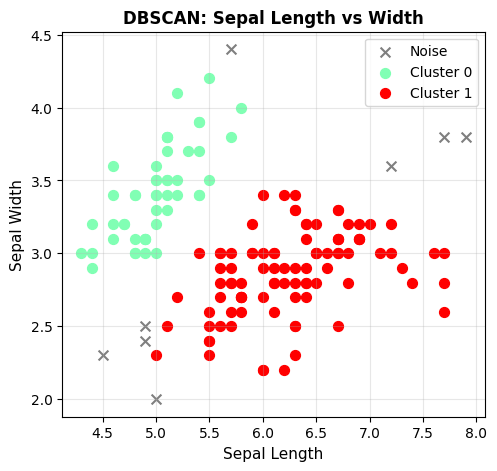

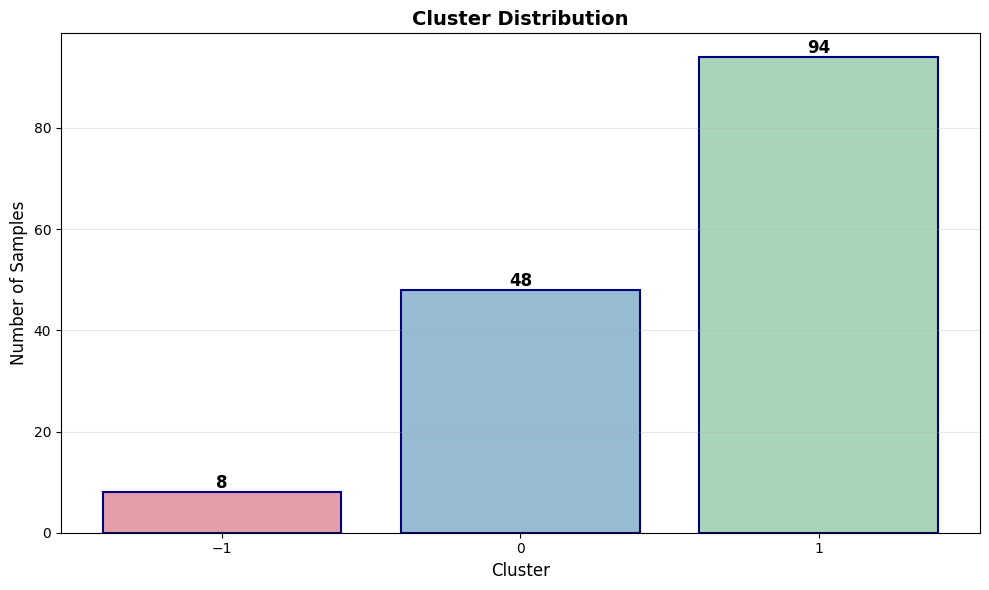

Cluster -1: 8 samples
Cluster 0: 48 samples
Cluster 1: 94 samples


In [10]:
print("\n" + "="*60)
print("VISUALIZATION")
print("="*60)

# Scatter plot of clusters
plt.figure(figsize=(12, 5))

# Plot 1: Sepal Length vs Sepal Width
plt.subplot(1, 2, 1)
unique_clusters = df['cluster'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

for cluster_id, color in zip(sorted(unique_clusters), colors):
    if cluster_id == -1:
        # Noise points in black
        subset = df[df['cluster'] == cluster_id]
        plt.scatter(subset['sepal_length'], subset['sepal_width'],
                   color='black', marker='x', s=50, label='Noise', alpha=0.5)
    else:
        subset = df[df['cluster'] == cluster_id]
        plt.scatter(subset['sepal_length'], subset['sepal_width'],
                   color=color, label=f'Cluster {cluster_id}', s=50)

plt.xlabel('Sepal Length', fontsize=11)
plt.ylabel('Sepal Width', fontsize=11)
plt.title('DBSCAN: Sepal Length vs Width', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

cluster_counts = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, 
                color=['#e39fa9', '#97bbd3', '#a8d5ba'], 
                edgecolor='navy', linewidth=1.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Cluster Distribution', fontsize=14, fontweight='bold')
plt.xticks(cluster_counts.index)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} samples")
